In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
product = pd.read_csv('./data/product.csv', on_bad_lines='skip')
transaction = pd.read_csv('./data/transaction_new.csv')

In [3]:
product.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [4]:
transaction_join_product = pd.merge(transaction, product, how='left', left_on='product_id', right_on='id')
paid_transaction_join_product = transaction_join_product[transaction_join_product['payment_status']=='Success']
paid_transaction_join_product

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,...,54728.0,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,...,16193.0,Men,Apparel,Topwear,Sweaters,Green,Fall,2011.0,Casual,Puma Men Knitted Vest Green Sweater
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,...,53686.0,Women,Accessories,Bags,Handbags,Purple,Summer,2012.0,Casual,Kiara Women Purple & Yellow Handbag
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,...,20228.0,Women,Apparel,Topwear,Sweaters,Red,Fall,2011.0,Casual,Wrangler Women Cable Red Sweater
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,...,55220.0,Women,Personal Care,Lips,Lip Liner,Brown,Spring,2017.0,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254579,2020-11-12T18:19:20.074873Z,25121,7fdc05d1-234b-4889-a343-587ffc0635d5,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,Debit Card,Success,0,NaN,10000,2020-11-18T18:06:06.493534Z,...,42915.0,Women,Accessories,Belts,Belts,Grey,Summer,2012.0,Casual,French Connection Women Grey Belt
1254581,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,...,19394.0,Men,Apparel,Topwear,Jackets,Blue,Summer,2011.0,Casual,ADIDAS Men Solid Blue Jacket
1254582,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,...,13079.0,Men,Footwear,Shoes,Casual Shoes,White,Fall,2011.0,Casual,Numero Uno Men White Casual Shoes
1254583,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,...,11312.0,Men,Apparel,Bottomwear,Trousers,Beige,Fall,2011.0,Casual,Scullers Men Rugged Chinos Beige Trousers


In [5]:
no_id_in_product_table = transaction_join_product[transaction_join_product.id.isnull()]['product_id'].reset_index(drop=True).to_frame()
no_id_in_product_table = no_id_in_product_table.drop_duplicates()
no_id_in_product_list = no_id_in_product_table['product_id'].to_list()

In [6]:
transaction[transaction['product_id'].isin(no_id_in_product_list)]

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
1876,2020-02-09T14:18:15.691523Z,58112,9f70438b-826b-4cb8-93c0-f73f382b2e10,c4896aa5-364f-4900-8dee-e0941a54e70e,LinkAja,Success,0,NaN,10000,2020-02-13T11:57:34.725541Z,-6.237364,106.877871,166096,23116,1,156096
2054,2020-02-01T16:32:53.972979Z,36622,69d7f779-355b-4753-872d-84fc8b1df565,bf2a1998-fe74-4a84-b9ad-021da764674e,OVO,Success,0,NaN,10000,2020-02-04T10:03:24.558261Z,-6.751447,107.917169,1635524,23111,4,406381
2173,2019-07-16T07:28:59.909909Z,52757,1218b3c7-850b-45c8-8fff-c9b7a0412a18,7d5f70b1-1ea4-4725-a01b-a2eb9874f4b6,OVO,Success,8672,AZ2022,10000,2019-07-21T14:49:55.595826Z,-6.142389,106.950660,271565,3418,1,270237
4022,2020-05-20T03:45:19.071343Z,93592,f9b061a9-ed7e-4040-9986-f65d87e4075f,c1b492ee-c4b0-448a-9227-38b91a7ab975,Credit Card,Success,5179,BUYMORE,5000,2020-05-22T01:50:40.988020Z,-7.484963,108.786190,602335,23114,3,200838
6686,2018-05-04T20:43:08.369178Z,25003,a0d9f2cf-ed64-4744-9da9-94e0cd04f967,95b5c4fb-59d8-419c-91e9-272027d69f1a,Credit Card,Success,0,NaN,0,2018-05-10T17:12:17.607398Z,1.123446,113.417780,605973,3418,1,250099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245858,2020-04-10T09:44:42.398364Z,19167,cdb89f4d-9990-4a47-9c37-d39590155462,909e593a-3120-4eea-ada6-9da791b3dab9,OVO,Success,4162,AZ2022,0,2020-04-15T01:50:19.263908Z,-6.650735,107.390017,1294106,23111,1,254161
1246073,2022-04-20T11:14:00.133924Z,4311,714bb3a7-fb16-4c0c-b04a-0fb0933d71a4,4a7a5d09-2c39-4260-845e-9c6ed0f8de4f,Debit Card,Success,0,NaN,0,2022-04-24T01:08:37.866331Z,-7.853953,114.289265,1750157,23100,1,234824
1249255,2021-01-02T01:42:14.436504Z,72661,b4f3bd54-a9cb-466c-82ad-4451a123331a,5cd62fc4-38fe-4f61-ad79-0ee17618d4a1,Credit Card,Success,0,NaN,5000,2021-01-07T04:52:16.583177Z,-7.127386,110.320302,551900,23127,2,273450
1253549,2018-05-03T19:55:31.658467Z,9324,2dc58738-8872-4208-b127-6fd74b3304f7,9fe1ed7a-4ec9-48f0-ae77-543365ae18f4,Gopay,Success,0,NaN,10000,2018-05-07T04:54:05.416794Z,-7.843182,112.706474,541543,4854,1,364363


In [7]:
paid_transaction_product = paid_transaction_join_product[['product_id', 'quantity', 'gender', 'masterCategory', 'subCategory', 'articleType', 'usage', 'productDisplayName', 'item_price']]
paid_transaction_product

,product_id,quantity,gender,masterCategory,subCategory,articleType,usage,productDisplayName,item_price
0,54728,1,Men,Footwear,Shoes,Casual Shoes,Casual,Vans Men Black Shoes,191247
1,16193,1,Men,Apparel,Topwear,Sweaters,Casual,Puma Men Knitted Vest Green Sweater,145526
2,53686,4,Women,Accessories,Bags,Handbags,Casual,Kiara Women Purple & Yellow Handbag,135174
3,20228,1,Women,Apparel,Topwear,Sweaters,Casual,Wrangler Women Cable Red Sweater,271012
4,55220,1,Women,Personal Care,Lips,Lip Liner,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03,198753
...,...,...,...,...,...,...,...,...,...
1254579,42915,1,Women,Accessories,Belts,Belts,Casual,French Connection Women Grey Belt,277688
1254581,19394,1,Men,Apparel,Topwear,Jackets,Casual,ADIDAS Men Solid Blue Jacket,354213
1254582,13079,4,Men,Footwear,Shoes,Casual Shoes,Casual,Numero Uno Men White Casual Shoes,288835
1254583,11312,1,Men,Apparel,Bottomwear,Trousers,Casual,Scullers Men Rugged Chinos Beige Trousers,188646


In [8]:
more_then_two = paid_transaction_product[paid_transaction_product['quantity'] >= 2]
paid_product = paid_transaction_product.drop(more_then_two.index)
paid_product

,product_id,quantity,gender,masterCategory,subCategory,articleType,usage,productDisplayName,item_price
0,54728,1,Men,Footwear,Shoes,Casual Shoes,Casual,Vans Men Black Shoes,191247
1,16193,1,Men,Apparel,Topwear,Sweaters,Casual,Puma Men Knitted Vest Green Sweater,145526
3,20228,1,Women,Apparel,Topwear,Sweaters,Casual,Wrangler Women Cable Red Sweater,271012
4,55220,1,Women,Personal Care,Lips,Lip Liner,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03,198753
5,59620,1,Women,Apparel,Saree,Sarees,Ethnic,FNF Green & Black Wedding Collection Sari,183234
...,...,...,...,...,...,...,...,...,...
1254578,28377,1,Men,Accessories,Eyewear,Sunglasses,Casual,Idee Men Brown Sunglasses,114354
1254579,42915,1,Women,Accessories,Belts,Belts,Casual,French Connection Women Grey Belt,277688
1254581,19394,1,Men,Apparel,Topwear,Jackets,Casual,ADIDAS Men Solid Blue Jacket,354213
1254583,11312,1,Men,Apparel,Bottomwear,Trousers,Casual,Scullers Men Rugged Chinos Beige Trousers,188646


In [9]:
from tqdm import tqdm

In [10]:
paid_product_new = paid_product.copy()
more_then_two_flatten_list = [] 
for _, value in tqdm(more_then_two.iterrows()) : 
    iter_count = value['quantity']
    for i in range(iter_count) : 
        more_then_two_flatten_list.append(value)

206799it [00:09, 21600.47it/s]


In [11]:
more_then_two_flatten = pd.concat(more_then_two_flatten_list, axis=1, ignore_index=True)
more_then_two_flatten = more_then_two_flatten.T

,0,1,2,3,4,5,6,7,8,9,...,778163,778164,778165,778166,778167,778168,778169,778170,778171,778172
product_id,53686,53686,53686,53686,24081,24081,24081,24081,24081,24081,...,49616,6068,6068,6068,6068,6068,13079,13079,13079,13079
quantity,4,4,4,4,6,6,6,6,6,6,...,6,5,5,5,5,5,4,4,4,4
gender,Women,Women,Women,Women,Women,Women,Women,Women,Women,Women,...,Women,Men,Men,Men,Men,Men,Men,Men,Men,Men
masterCategory,Accessories,Accessories,Accessories,Accessories,Footwear,Footwear,Footwear,Footwear,Footwear,Footwear,...,Footwear,Apparel,Apparel,Apparel,Apparel,Apparel,Footwear,Footwear,Footwear,Footwear
subCategory,Bags,Bags,Bags,Bags,Shoes,Shoes,Shoes,Shoes,Shoes,Shoes,...,Shoes,Topwear,Topwear,Topwear,Topwear,Topwear,Shoes,Shoes,Shoes,Shoes
articleType,Handbags,Handbags,Handbags,Handbags,Casual Shoes,Casual Shoes,Casual Shoes,Casual Shoes,Casual Shoes,Casual Shoes,...,Heels,Tshirts,Tshirts,Tshirts,Tshirts,Tshirts,Casual Shoes,Casual Shoes,Casual Shoes,Casual Shoes
usage,Casual,Casual,Casual,Casual,Casual,Casual,Casual,Casual,Casual,Casual,...,Casual,Casual,Casual,Casual,Casual,Casual,Casual,Casual,Casual,Casual
productDisplayName,Kiara Women Purple & Yellow Handbag,Kiara Women Purple & Yellow Handbag,Kiara Women Purple & Yellow Handbag,Kiara Women Purple & Yellow Handbag,Catwalk Women Red Casual Shoes,Catwalk Women Red Casual Shoes,Catwalk Women Red Casual Shoes,Catwalk Women Red Casual Shoes,Catwalk Women Red Casual Shoes,Catwalk Women Red Casual Shoes,...,Catwalk Women Brown Heels,UCB Men's Polo Neck Striper Heavy Wash Blue Pi...,UCB Men's Polo Neck Striper Heavy Wash Blue Pi...,UCB Men's Polo Neck Striper Heavy Wash Blue Pi...,UCB Men's Polo Neck Striper Heavy Wash Blue Pi...,UCB Men's Polo Neck Striper Heavy Wash Blue Pi...,Numero Uno Men White Casual Shoes,Numero Uno Men White Casual Shoes,Numero Uno Men White Casual Shoes,Numero Uno Men White Casual Shoes
item_price,135174,135174,135174,135174,314243,314243,314243,314243,314243,314243,...,174019,331316,331316,331316,331316,331316,288835,288835,288835,288835


In [14]:
paid_product_new = pd.concat([paid_product_new, more_then_two_flatten], axis=0, ignore_index=True).drop('quantity', axis=1).reset_index(drop=True)
paid_product_new

,product_id,gender,masterCategory,subCategory,articleType,usage,productDisplayName,item_price
0,54728,Men,Footwear,Shoes,Casual Shoes,Casual,Vans Men Black Shoes,191247
1,16193,Men,Apparel,Topwear,Sweaters,Casual,Puma Men Knitted Vest Green Sweater,145526
2,20228,Women,Apparel,Topwear,Sweaters,Casual,Wrangler Women Cable Red Sweater,271012
3,55220,Women,Personal Care,Lips,Lip Liner,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03,198753
4,59620,Women,Apparel,Saree,Sarees,Ethnic,FNF Green & Black Wedding Collection Sari,183234
...,...,...,...,...,...,...,...,...
1772404,6068,Men,Apparel,Topwear,Tshirts,Casual,UCB Men's Polo Neck Striper Heavy Wash Blue Pi...,331316
1772405,13079,Men,Footwear,Shoes,Casual Shoes,Casual,Numero Uno Men White Casual Shoes,288835
1772406,13079,Men,Footwear,Shoes,Casual Shoes,Casual,Numero Uno Men White Casual Shoes,288835
1772407,13079,Men,Footwear,Shoes,Casual Shoes,Casual,Numero Uno Men White Casual Shoes,288835


<AxesSubplot:xlabel='masterCategory', ylabel='gender'>

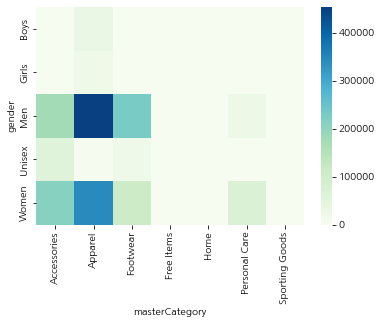

In [65]:
sns.heatmap(pd.crosstab(paid_product_new['gender'], 
                        paid_product_new['masterCategory']), cmap='GnBu')

In [15]:
men_product = paid_product_new[paid_product_new['gender']=='Men']
women_product = paid_product_new[paid_product_new['gender']=='Women']
kids_product = paid_product_new[(paid_product_new['gender']=='Girls')|(paid_product_new['gender']=='Boys')]
unisex_product = paid_product_new[paid_product_new['gender']=='Unisex']

In [66]:
men_product.masterCategory.unique()

array(['Footwear', 'Apparel', 'Accessories', 'Free Items',
       'Personal Care'], dtype=object)

In [115]:
men_apparel = men_product[men_product.masterCategory == 'Apparel']
women_apparel = women_product[women_product.masterCategory == 'Apparel']

men_footwear = men_product[men_product.masterCategory == 'Footwear']
women_footwear = women_product[women_product.masterCategory == 'Footwear']

men_accessories = men_product[men_product.masterCategory == 'Accessories']
women_accessories = women_product[women_product.masterCategory == 'Accessories']

In [17]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Stopwords

In [144]:
stop_words_list = ['men', 'black', 'blue', 'women', 'navy', 'shirt', 't',
                  'colors', 'check', 'red', 'grey', 'printed', 'white', 'green',
                  'tshirt', 'striped', 'shirts', 'purple', 'breif', 'short', 
                   'blue', 'printed', 'solid', 'stripe', 'stripes', 'woman', 
                   'top', 'coloured', 'multi', 'kids', 'girl', 'femella', 'pink', 'rose', 
                   'united', 'casual shoe', 'flip', 'flops', 'sports', 'formal shoe', 
                   'shoes', 'brown', 'casual', 'shoe', 'formal', 'sandals', 'tape', 
                   'filp flops', 'leather', 'dial' ,'dial watch', 'watch', 'chronograph', 'digital', 
                   'digital watch', 'chronograph watch', 'accessory gift', 'accessory', 'gift',
                   'analogue watch','analogue', 'Backpack', 'pack', 'silver', 'flats catwalk', 'flats', 
                   'heels', 'toe', 'gold', 'handbag', 'baggit', 'handbag baggit',' sling bag', 'wallet', 
                   'wallet baggit', 'belt', 'belt baggit', 'bag', 'pendant', 'earring', 'sling', 'beige'
                   'handbags', 'leatherette', 'earrings', 'ring', 'sunglasses', 'clutch'
                  ]

In [145]:
for word in stop_words_list : 
    STOPWORDS.add(word)

# Men

## Apparel

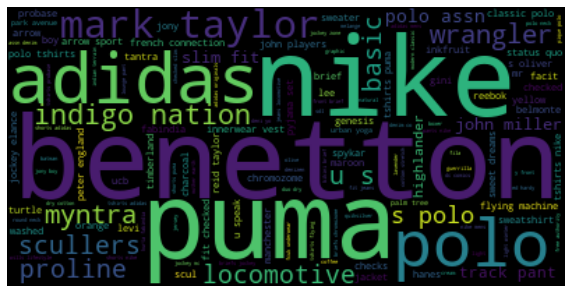

In [159]:
men_apparel_text = men_apparel['productDisplayName'].tolist()
men_apparel_text = ' '.join(men_apparel_text).lower()
men_apparel_wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True).generate(men_apparel_text)

plt.figure(figsize=(10,6))
plt.imshow(men_apparel_wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [176]:
print('Polo : ', men_apparel[men_apparel['productDisplayName'].str.contains('Polo')].shape[0])
print('Nike : ', men_apparel[men_apparel['productDisplayName'].str.contains('Nike')].shape[0])
print('ADIDAS : ', men_apparel[men_apparel['productDisplayName'].str.contains('ADIDAS')].shape[0])
print('Benetton : ', men_apparel[men_apparel['productDisplayName'].str.contains('Benetton')].shape[0])
print('Puma : ', men_apparel[men_apparel['productDisplayName'].str.contains('Puma')].shape[0])
print('Mark Taylor : ', men_apparel[men_apparel['productDisplayName'].str.contains('Mark Taylor')].shape[0])
print('Myntra', men_apparel[men_apparel['productDisplayName'].str.contains('Myntra')].shape[0])
print('Proline', men_apparel[men_apparel['productDisplayName'].str.contains('Proline')].shape[0])
print('Locomotive', men_apparel[men_apparel['productDisplayName'].str.contains('Locomotive')].shape[0])
print('Scullers', men_apparel[men_apparel['productDisplayName'].str.contains('Scullers')].shape[0])

POLO :  53810
Nike :  31351
ADIDAS :  30444
Benetton :  20448
Puma :  27735
Mark Taylor :  12780
Myntra 13866
Proline 13543
Locomotive 12660
Scullers 12461


In [171]:
print('', men_apparel[men_apparel['productDisplayName'].str.contains('Proline')].shape[0])
print('', men_apparel[men_apparel['productDisplayName'].str.contains('Myntra')].shape[0])
print('', men_apparel[men_apparel['productDisplayName'].str.contains('Locomotive')].shape[0])
print('', men_apparel[men_apparel['productDisplayName'].str.contains('Scullers')].shape[0])

,product_id,gender,masterCategory,subCategory,articleType,usage,productDisplayName,item_price
24,4063,Men,Apparel,Topwear,Tshirts,Casual,Myntra Men's Friend White T-shirt,118487
42,47283,Men,Apparel,Topwear,Tshirts,Casual,Myntra Men Pack of 3 T-shirt,376642
114,3351,Men,Apparel,Topwear,Tshirts,Casual,Myntra Men's Black Letter Equals White T-shirt,238929
634,4032,Men,Apparel,Topwear,Tshirts,Casual,Myntra Men's I'd Love To Help You Out Black T-...,474363
679,34406,Men,Apparel,Topwear,Tshirts,Casual,Myntra Men Black Printed T-shirt,234272
...,...,...,...,...,...,...,...,...
1770436,34332,Men,Apparel,Topwear,Tshirts,Casual,Myntra Men Purple T-shirt,388701
1770763,51430,Men,Apparel,Topwear,Shirts,Casual,Myntra Men Navy Blue & Orange Check Shirt,172422
1770764,51430,Men,Apparel,Topwear,Shirts,Casual,Myntra Men Navy Blue & Orange Check Shirt,172422
1771808,34324,Men,Apparel,Topwear,Tshirts,Casual,Myntra Men Extreme Disturbance Red T-shirt,229101


In [174]:
men_apparel[men_apparel['productDisplayName'].str.contains('Proline')]

,product_id,gender,masterCategory,subCategory,articleType,usage,productDisplayName,item_price
75,13796,Men,Apparel,Topwear,Tshirts,Casual,Proline Mens Stripes Grey & White Striped T-shirt,342960
292,26279,Men,Apparel,Topwear,Tshirts,Casual,Proline Men Grey Polo T-shirt,439451
361,28674,Men,Apparel,Topwear,Tshirts,Casual,Proline Men White Polo Tshirt,214228
368,7873,Men,Apparel,Topwear,Tshirts,Casual,Proline Men Multicoloured Striped Polo T-shirt,337830
606,7441,Men,Apparel,Topwear,Tshirts,Casual,Proline Men Grey Striped T-shirt,449328
...,...,...,...,...,...,...,...,...
1771635,26281,Men,Apparel,Topwear,Tshirts,Casual,Proline Men Black Printed T-shirt,372009
1771636,26281,Men,Apparel,Topwear,Tshirts,Casual,Proline Men Black Printed T-shirt,372009
1772323,28846,Men,Apparel,Topwear,Tshirts,Casual,Proline Men Maroon T-shirt,150507
1772324,28846,Men,Apparel,Topwear,Tshirts,Casual,Proline Men Maroon T-shirt,150507


## Footwear

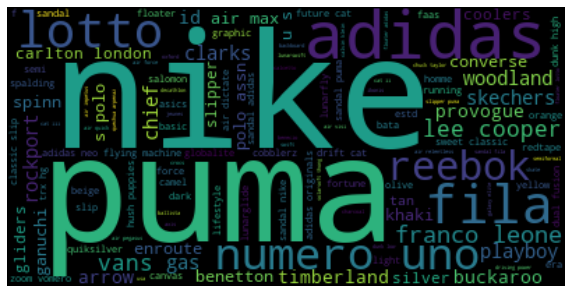

In [81]:
men_footwear_text = men_footwear['productDisplayName'].tolist()
men_footwear_text = ' '.join(men_footwear_text).lower()
men_footwear_wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True).generate(men_footwear_text)

plt.figure(figsize=(10,6))
plt.imshow(men_footwear_wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

## Accessories

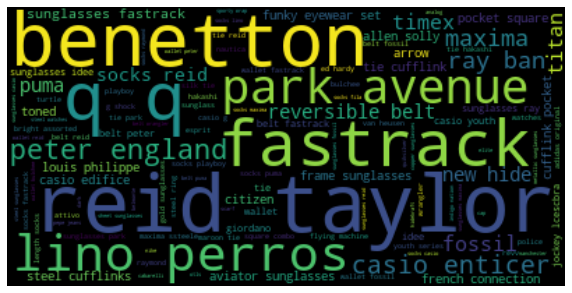

In [109]:
men_accessories_text = men_accessories['productDisplayName'].tolist()
men_accessories_text = ' '.join(men_accessories_text).lower()
men_accessories_wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True).generate(men_accessories_text)

plt.figure(figsize=(10,6))
plt.imshow(men_accessories_wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

# Women

## Apparel

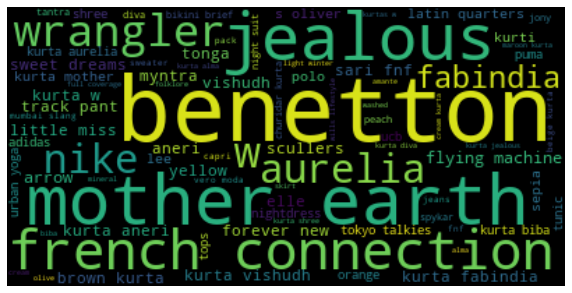

In [58]:
women_apparel_text = women_apparel['productDisplayName'].tolist()
women_apparel_text = ' '.join(women_apparel_text).lower()
women_apparel_wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True).generate(women_apparel_text)

plt.figure(figsize=(10,6))
plt.imshow(women_apparel_wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

## Footwear

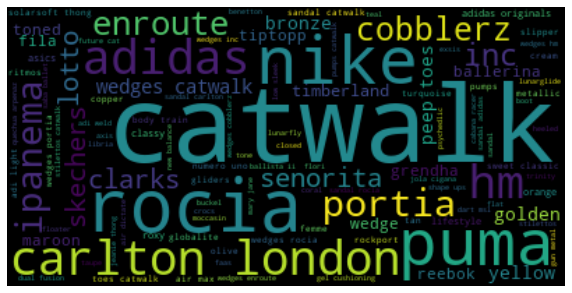

In [147]:
women_footwear_text = women_footwear['productDisplayName'].tolist()
women_footwear_text = ' '.join(women_footwear_text).lower()
women_footwear_wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True).generate(women_footwear_text)

plt.figure(figsize=(10,6))
plt.imshow(women_footwear_wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

## Accessories

In [123]:
women_accessories = women_accessories.dropna()

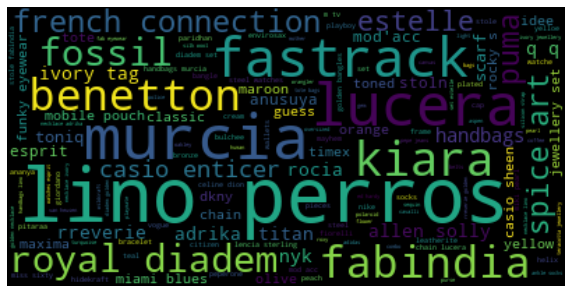

In [146]:
women_accessories_text = women_accessories['productDisplayName'].tolist()
women_accessories_text = ' '.join(women_accessories_text).lower()
women_accessories_wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True).generate(women_accessories_text)

plt.figure(figsize=(10,6))
plt.imshow(women_accessories_wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [177]:
paid_product_new.to_csv('./data/product_quantity_flatten.csv', index=False)